In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import classification_report
from sklearn.svm import SVC
import seaborn as sns

In [2]:
mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset1/data_te.mat')
test1 = mat['data_te']

mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset1/data_tr.mat')
train1 = mat['data_tr']

In [3]:
mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset2/data_te.mat')
test2 = mat['data_te']

mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset2/data_tr.mat')
train2 = mat['data_tr']

In [4]:
mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset3/data_te.mat')
test3 = mat['data_te']

mat = loadmat('/Users/daniel/Documents/A4/PYTHON/PROJET/Datasets/dataset3/data_tr.mat')
train3 = mat['data_tr']

In [5]:
df_train1=pd.DataFrame(train1)
df_train1['Name'] = 1 #Parrot
df_train2=pd.DataFrame(train2)
df_train2['Name'] = 2 #DBPower
df_train3=pd.DataFrame(train3)
df_train3['Name'] = 3 #DJI
data_tr=pd.concat([df_train1, df_train2,df_train3])

In [6]:
df_test1=pd.DataFrame(test1)
df_test1['Name'] = 1
df_test2=pd.DataFrame(test2)
df_test2['Name'] = 2
df_test3=pd.DataFrame(test3)
df_test3['Name'] = 3
data_te=pd.concat([df_test1, df_test2,df_test3])
print('te',data_te.size)
print('tr',data_tr.size)

te 2145696
tr 213920


In [7]:
features={0:"uplink_size_mean",
1:"uplink_size_median",
2:"uplink_size_MAD",
3:"uplink_size_STD",
4:"uplink_size_Skewness",
5:"uplink_size_Kurtosis",
6:"uplink_size_MAX",
7:"uplink_size_MIN",
8:"uplink_size_MeanSquare",
9:"downlink_size_mean",
10:"downlink_size_median",
11:"downlink_size_MAD",
12:"downlink_size_STD",
13:"downlink_size_Skewness",
14:"downlink_size_Kurtosis",
15:"downlink_size_MAX",
16:"downlink_size_MIN",
17:"downlink_size_MeanSquare",
18:"both_links_size_mean",
19:"both_links_size_median",
20:"both_links_size_MAD",
21:"both_links_size_STD",
22:"both_links_size_Skewness",
23:"both_links_size_Kurtosis",
24:"both_links_size_MAX",
25:"both_links_size_MIN",
26:"both_links_size_MeanSquare",
27:"uplink_interval_mean",
28:"uplink_interval_median",
29:"uplink_interval_MAD",
30:"uplink_interval_STD",
31:"uplink_interval_Skewness",
32:"uplink_interval_Kurtosis",
33:"uplink_interval_MAX",
34:"uplink_interval_MIN",
35:"uplink_interval_MeanSquare",
36:"downlink_interval_mean",
37:"downlink_interval_median",
38:"downlink_interval_MAD",
39:"downlink_interval_STD",
40:"downlink_interval_Skewness",
41:"downlink_interval_Kurtosis",
42:"downlink_interval_MAX",
43:"downlink_interval_MIN",
44:"downlink_interval_MeanSquare",
45:"both_links_interval_mean",
46:"both_links_interval_median",
47:"both_links_interval_MAD",
48:"both_links_interval_STD",
49:"both_links_interval_Skewness",
50:"both_links_interval_Kurtosis",
51:"both_links_interval_MAX",
52:"both_links_interval_MIN",
53:"both_links_interval_MeanSquare",
54:"label",
55:"Name"}
data_te=data_te.rename(columns=features)
data_tr=data_tr.rename(columns=features)

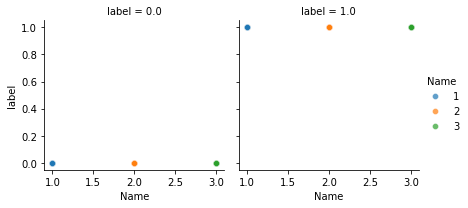

In [8]:
g=sns.FacetGrid(data_te, col="label", hue="Name")
g.map(sns.scatterplot, "Name", "label", alpha=.7)
g.add_legend()

In [9]:
#drop all data which are not about UAV 
data_tr = data_tr.drop(data_tr[data_tr.label ==0].index)
data_te = data_te.drop(data_te[data_te.label ==0].index)
#drop column label
data_tr=data_tr.drop(columns='label')
data_te=data_te.drop(columns='label')

In [10]:
data_te.head()

,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,...,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,Name
0,0.011144,0.010568,0.005403,0.005441,0.595357,-1.414428,0.027908,0.000473,0.015294,123.280702,...,193.21,280.154910,138.0,16.3086,2.973865,7.098149,1145.0,70.0,339.163692,1
1,0.009074,0.009746,0.004770,0.005561,0.817434,-0.945456,0.027311,0.000031,0.013160,102.565217,...,743.85,499.331682,1130.0,0.0000,-0.517908,-1.728870,1130.0,70.0,894.511951,1
2,0.010618,0.009797,0.007069,0.009864,0.458063,-1.428265,0.027570,0.000007,0.014343,99.937500,...,567.72,514.805486,151.0,120.0906,0.168299,-1.971775,1130.0,70.0,764.643996,1
3,0.006668,0.008201,0.002745,0.003318,1.171704,-0.173755,0.026633,0.000009,0.010460,92.206897,...,649.11,517.013801,1130.0,0.0000,-0.145954,-1.981538,1145.0,70.0,828.235492,1
4,0.009447,0.011816,0.005154,0.005924,2.325694,5.693968,0.052976,0.000005,0.014917,99.954545,...,684.36,509.183790,1130.0,0.0000,-0.268890,-1.928930,1130.0,70.0,851.483447,1


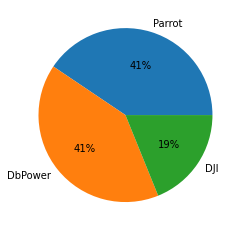

In [11]:
# plot
UAVnames=['Parrot','DbPower','DJI']
plt.pie(data_te['Name'].value_counts(), labels = UAVnames, autopct='%.0f%%')
plt.show()

Name                              1.000000
downlink_size_mean                0.881025
downlink_size_MeanSquare          0.853912
downlink_size_MIN                 0.764552
both_links_interval_MIN           0.754825
downlink_interval_MAD             0.664044
downlink_size_MAD                 0.608923
downlink_interval_STD             0.571360
both_links_interval_Kurtosis      0.554614
both_links_size_mean              0.546708
uplink_size_STD                   0.537764
both_links_interval_Skewness      0.533526
downlink_interval_mean            0.509253
uplink_interval_MIN               0.483993
uplink_size_MAD                   0.472108
uplink_size_mean                  0.452570
uplink_interval_Kurtosis          0.452144
uplink_interval_Skewness          0.443406
both_links_size_Skewness          0.440316
downlink_interval_MIN             0.404422
downlink_interval_Skewness        0.398105
downlink_size_Kurtosis            0.389298
uplink_size_Skewness              0.292869
downlink_si

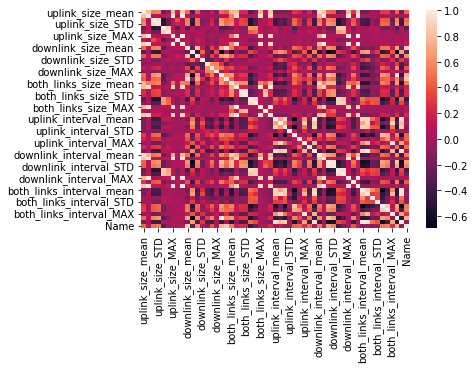

In [12]:
corrMatrix = data_te.corr()
print(corrMatrix['Name'].abs().sort_values(ascending=False))
sns.heatmap(corrMatrix)
plt.show()

<AxesSubplot:xlabel='Name', ylabel='downlink_size_MeanSquare'>

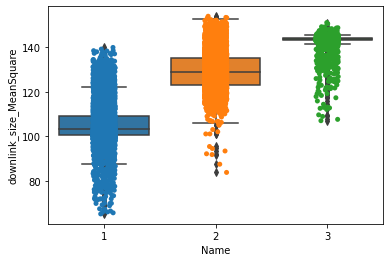

In [13]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Name", y="downlink_size_MeanSquare", data=data_te)
# Add in points to show each observation
sns.stripplot(x="Name", y="downlink_size_MeanSquare", data=data_te)

<AxesSubplot:xlabel='Name', ylabel='uplink_size_STD'>

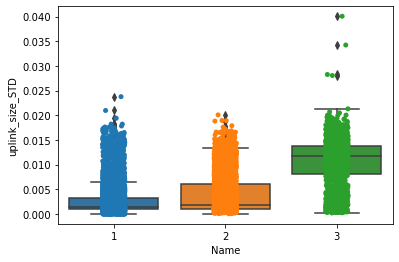

In [14]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Name", y="uplink_size_STD", data=data_te)
# Add in points to show each observation
sns.stripplot(x="Name", y="uplink_size_STD", data=data_te)

<AxesSubplot:xlabel='Name', ylabel='both_links_interval_MIN'>

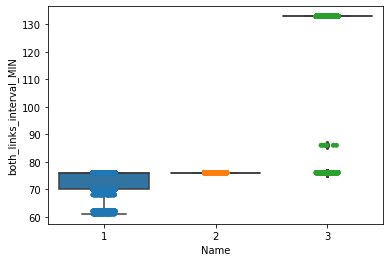

In [15]:
# Plot the orbital period with horizontal boxes
sns.boxplot(x="Name", y="both_links_interval_MIN", data=data_te)
# Add in points to show each observation
sns.stripplot(x="Name", y="both_links_interval_MIN", data=data_te)

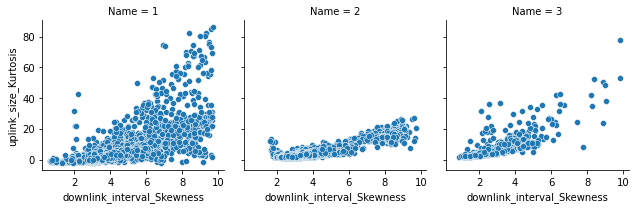

In [16]:

sns.relplot(data=data_te,x="downlink_interval_Skewness", y="uplink_size_Kurtosis",col='Name',height=3)

In [17]:
names=[v for v in features.values()]

(0.0, 0.05)

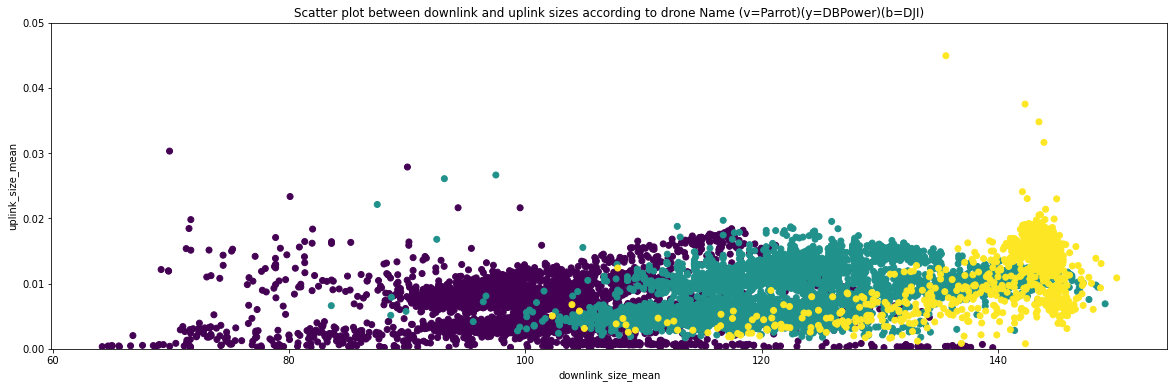

In [18]:
plt.figure(figsize = (20, 6))
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=data_te["Name"])
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Scatter plot between downlink and uplink sizes according to drone Name (v=Parrot)(y=DBPower)(b=DJI)')
plt.ylim(0,0.05)

              precision    recall  f1-score   support

           1       0.91      0.89      0.90      5377
           2       0.85      0.86      0.86      5377
           3       0.90      0.92      0.91      2500

    accuracy                           0.88     13254
   macro avg       0.89      0.89      0.89     13254
weighted avg       0.88      0.88      0.88     13254



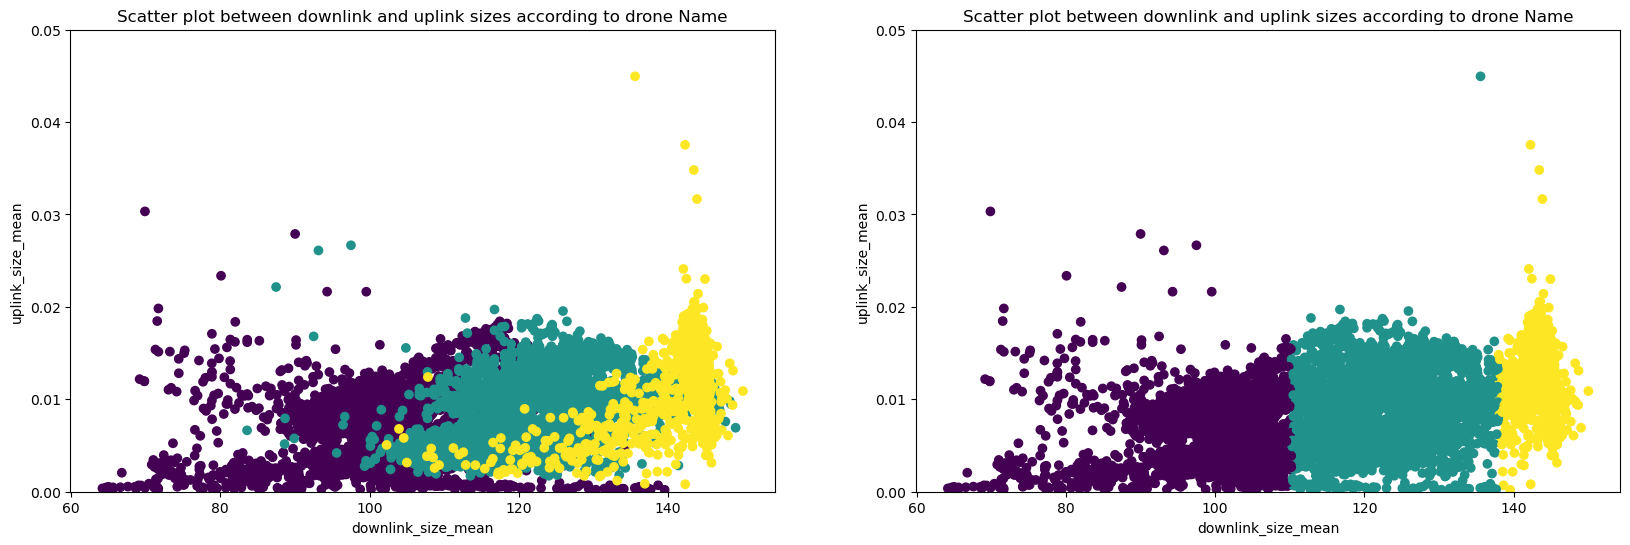

In [19]:
from sklearn.svm import SVC
x_features=['downlink_size_mean','uplink_size_mean']
X_train=data_tr[x_features]
y_train=data_tr['Name']
X_test=data_te[x_features]
y_test=data_te['Name']
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

#Prediction sur le Test set
y_pred = classifier.predict(X_test)

print(classification_report(y_test, y_pred))

mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=data_te['Name'])
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Scatter plot between downlink and uplink sizes according to drone Name')
plt.ylim(0,0.05)

plt.subplot(1, 2, 2)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=y_pred)
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Scatter plot between downlink and uplink sizes according to drone Name')
plt.ylim(0,0.05)
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5377
           2       1.00      1.00      1.00      5377
           3       0.99      0.99      0.99      2500

    accuracy                           1.00     13254
   macro avg       1.00      1.00      1.00     13254
weighted avg       1.00      1.00      1.00     13254



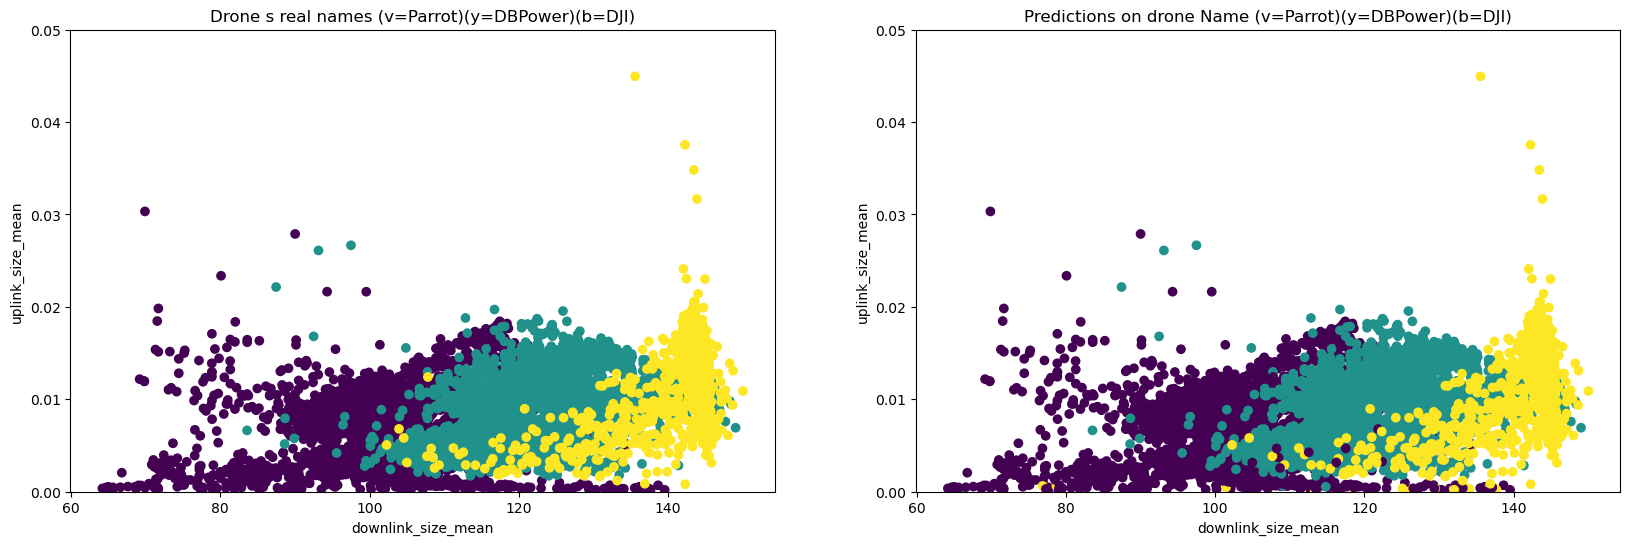

In [20]:
X_train=data_tr[names[:-2]]
y_train=data_tr['Name']

X_test=data_te[names[:-2]]
y_test=data_te['Name']

classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


print(classification_report(y_test, y_pred))

mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=data_te['Name'])
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Drone s real names (v=Parrot)(y=DBPower)(b=DJI)')
plt.ylim(0,0.05)

plt.subplot(1, 2, 2)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=y_pred)
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Predictions on drone Name (v=Parrot)(y=DBPower)(b=DJI)')
plt.ylim(0,0.05)
plt.show()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00      5377
           2       1.00      1.00      1.00      5377
           3       0.99      0.99      0.99      2500

    accuracy                           1.00     13254
   macro avg       1.00      1.00      1.00     13254
weighted avg       1.00      1.00      1.00     13254



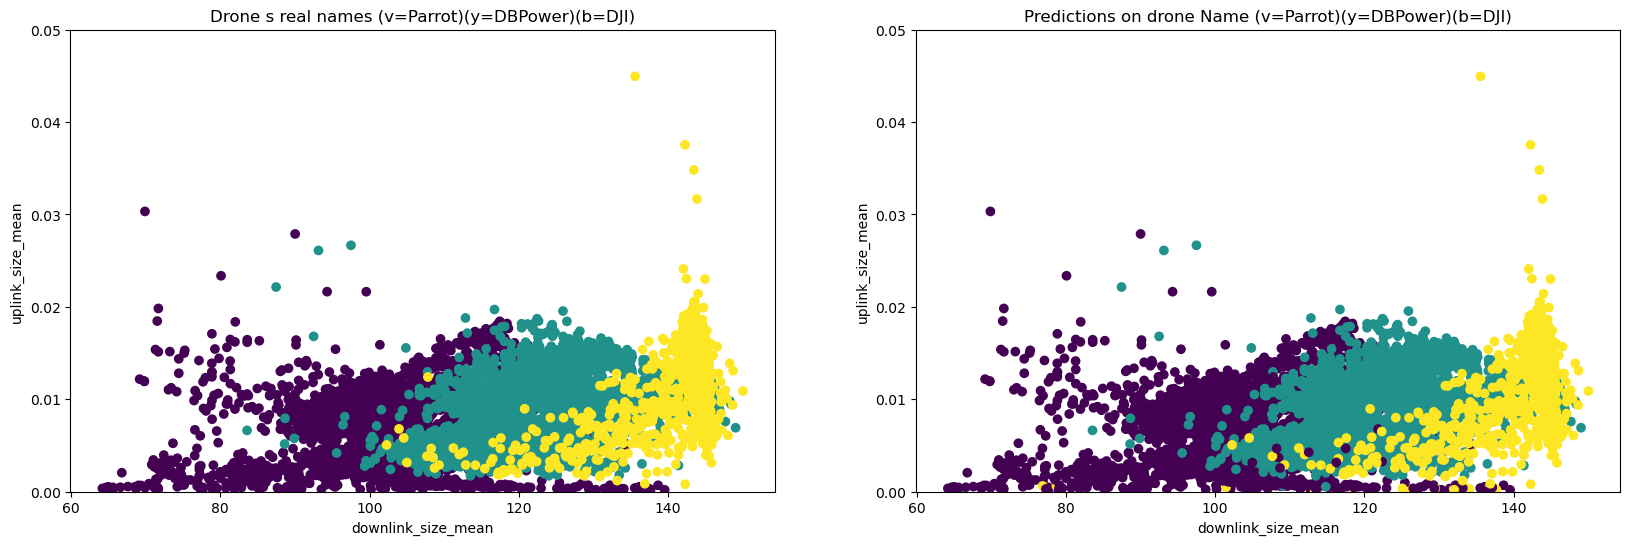

In [24]:
#names=[v for v in features.values()]
X_train_all=data_tr[names[:-2]]
X_test_all=data_te[names[:-2]]
from sklearn.preprocessing import StandardScaler
columns = X_train_all.columns
scalerx = StandardScaler()
X_train_scaled = scalerx.fit_transform(X_train_all)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = columns)

X_test_scaled = scalerx.transform(X_test_all)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = columns)



classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_scaled, y_train)

y_pred = classifier.predict(X_test_scaled)


print(classification_report(y_test, y_pred))

mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=data_te['Name'])
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Drone s real names (v=Parrot)(y=DBPower)(b=DJI)')
plt.ylim(0,0.05)

plt.subplot(1, 2, 2)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=y_pred)
plt.xlabel('downlink_size_mean')
plt.ylabel('uplink_size_mean')
plt.title('Predictions on drone Name (v=Parrot)(y=DBPower)(b=DJI)')
plt.ylim(0,0.05)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

pca = IncrementalPCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)



In [ ]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c = y_train)
plt.xlim(-1,5)
plt.xlabel('Training 1st Principal Component')
plt.ylabel('Training 2nd Principal Component')
plt.title('Training Set Scatter Plot with labels indicated by colors (1)->Violet (2)->Yellow (3)-> Blue')
plt.subplot(1, 2, 2)
plt.scatter(X_test_pca[:,0], X_test_pca[:,1], c = y_test)
plt.ylim(-10,10)
plt.xlim(-1,2)
plt.xlabel('Test 1st Principal Component')
plt.ylabel('Test 2nd Principal Component')
plt.title('Test Set Scatter Plot with labels indicated by colors (1)->Violet (2)->Yellow, (3)-> Blue')
plt.show()

In [ ]:
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_pca, y_train)
#Prediction sur le Test set
y_pred = classifier.predict(X_test_pca)

print(classification_report(y_test, y_pred))

mpl.rcParams.update(mpl.rcParamsDefault)
plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=data_te['Name'])
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Scatter plot between downlink and uplink sizes ')
plt.ylim(0,0.05)

plt.subplot(1, 2, 2)
plt.scatter(data_te["downlink_size_mean"],data_te['uplink_size_mean'],c=y_pred)
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('Prediction (v=Parrot)(y=DBPower)(b=DJI)')
plt.ylim(0,0.05)
plt.show()

In [ ]:
"""import math
f=[i for i in features.values()]
df=data_te
for f in features.values():
    i,j=0,0
    PLOTS_PER_ROW = 5
    fig, axs = plt.subplots(math.ceil(len(df.columns)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 60))
    print(f)
    for col in df.columns:
        axs[i][j].scatter(df[f], df[col],c=df['Name'], s=3)
        axs[i][j].set_ylabel(col)
        j+=1
        if j%PLOTS_PER_ROW==0:
            i+=1
            j=0
    plt.show()
plt.savefig("plots.pdf")"""